In [80]:
"""
@author: pho
Loads results previously produced by `pho_test_cnn.ipynb`
"""
## Automatic debugger on exception raised
# %pdb on
%pdb off
%load_ext autoreload
%autoreload 2
import sys
import importlib
from pathlib import Path
from copy import deepcopy
# from numba import jit
import numpy as np
import pandas as pd

%config Completer.use_jedi = False

# # required to enable non-blocking interaction:
# %gui qt5

import os
import dill as pickle

from neuropy.utils.load_exported import LoadXml, find_session_xml # for compute_with_params_loaded_from_xml
from cnn_ripple.PhoRippleDetectionTesting import ExtendedRippleDetection, main_compute_with_params_loaded_from_xml

""" TODO: refactor this into the session loading like the other imported properties """
def _perform_load_cnn_computed_ripples(active_local_session_path):
    ## Load existing result instead
    ripple_predicted_csv_filepath = active_local_session_path.joinpath('pred_ripples.csv')
    ripple_df_filepath = active_local_session_path.joinpath('ripple_df.pkl')
    
    in_ripple_detector_filepath = active_local_session_path.joinpath('ripple_detector.pkl') # Path(r'W:\Data\KDIBA\gor01\one\2006-6-07_11-26-53\ripple_detector.pkl')
    loaded_ripple_detector = ExtendedRippleDetection.load(in_ripple_detector_filepath)
    return loaded_ripple_detector

def _find_local_session_paths(local_session_parent_path, blacklist=[], debug_print=True):
    try:
        found_local_session_paths_list = [x for x in local_session_parent_path.iterdir() if x.is_dir()]
        local_session_names_list = [a_path.name for a_path in found_local_session_paths_list if a_path.name not in blacklist]
        if debug_print:
            print(f'local_session_names_list: {local_session_names_list}')
        local_session_paths_list = [local_session_parent_path.joinpath(a_name).resolve() for a_name in local_session_names_list]
        
    except Exception as e:
        print(f"Error processing path: '{local_session_parent_path}' due to exception: {e}. Skipping...")
        local_session_paths_list = None
        
    return local_session_paths_list

## Batch: Computes and saves the ripples for a single session folder:
def _batch_compute_ripples(local_session_path):
    """ Computes the ripples for a single session path  """
    print(f'Computing for "{local_session_path}"...')
    try:
        # active_detector, ripple_df, out_all_ripple_results = main_compute_with_params_loaded_from_xml(local_session_path)
        loaded_ripple_detector = _perform_load_cnn_computed_ripples(curr_active_pipeline.sess.basepath)
        # ripple_predictions_df = loaded_ripple_detector.continuous_ripple_likelihoods_df
        # prediction_timesteps = loaded_ripple_detector.continuous_ripple_prediction_timesteps
        # prediction_values = loaded_ripple_detector.continuous_ripple_shanks_prediction_values_array 
        # new_ripple_df = loaded_ripple_detector.detected_ripple_epochs_df
        # out_all_ripple_results =  DynamicContainer.init_from_dict(loaded_ripple_detector.out_all_ripple_results.copy())
    except Exception as e:
        print(f"Error processing path: '{local_session_path}' due to exception: {e}. Skipping...")
        loaded_ripple_detector = None
        
    return loaded_ripple_detector


Automatic pdb calling has been turned OFF
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
local_session_root_parent_path = Path(r'W:\Data\KDIBA') # Windows Apogee
# local_session_root_parent_path = Path(r'/media/MAX/Data/KDIBA') # Diba Lab Workstation Linux
# local_session_root_parent_path = Path(r'/Volumes/MoverNew/data/KDIBA') # rMBP
automated_configs = {}

In [74]:
## Automated:
local_session_parent_path = local_session_root_parent_path.joinpath('gor01', 'one')
local_session_paths_list =  _find_local_session_paths(local_session_parent_path, blacklist=['PhoHelpers', 'Spike3D-Minimal-Test', 'Unused'])
if local_session_paths_list:
    automated_configs[str(local_session_parent_path)] = local_session_paths_list

local_session_names_list: ['2006-6-07_11-26-53', '2006-6-08_14-26-15', '2006-6-09_1-22-43', '2006-6-09_3-23-37', '2006-6-12_15-55-31', '2006-6-13_14-42-6']


In [75]:
## Automated:
local_session_parent_path = local_session_root_parent_path.joinpath('gor01', 'two')
local_session_paths_list =  _find_local_session_paths(local_session_parent_path, blacklist=[])
if local_session_paths_list:
    automated_configs[str(local_session_parent_path)] = local_session_paths_list

local_session_names_list: ['2006-6-07_16-40-19', '2006-6-08_15-46-47', '2006-6-08_21-16-25']


In [76]:
## Automated:
local_session_parent_path = local_session_root_parent_path.joinpath('vvp01', 'one')
local_session_paths_list =  _find_local_session_paths(local_session_parent_path, blacklist=[])
if local_session_paths_list:
    automated_configs[str(local_session_parent_path)] = local_session_paths_list

Error processing path: 'W:\Data\KDIBA\vvp01\one' due to exception: [WinError 3] The system cannot find the path specified: 'W:\\Data\\KDIBA\\vvp01\\one'. Skipping...


In [77]:
## Automated:
local_session_parent_path = local_session_root_parent_path.joinpath('vvp01', 'two')
local_session_paths_list =  _find_local_session_paths(local_session_parent_path, blacklist=[])
if local_session_paths_list:
    automated_configs[str(local_session_parent_path)] = local_session_paths_list

Error processing path: 'W:\Data\KDIBA\vvp01\two' due to exception: [WinError 3] The system cannot find the path specified: 'W:\\Data\\KDIBA\\vvp01\\two'. Skipping...


In [78]:
automated_configs

{'W:\\Data\\KDIBA\\gor01\\one': [WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-07_11-26-53'),
  WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-08_14-26-15'),
  WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-09_1-22-43'),
  WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-09_3-23-37'),
  WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-12_15-55-31'),
  WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-13_14-42-6')],
 'W:\\Data\\KDIBA\\gor01\\two': [WindowsPath('W:/Data/KDIBA/gor01/two/2006-6-07_16-40-19'),
  WindowsPath('W:/Data/KDIBA/gor01/two/2006-6-08_15-46-47'),
  WindowsPath('W:/Data/KDIBA/gor01/two/2006-6-08_21-16-25')]}

In [ ]:
local_session_ripple_detectors = {}

for local_session_parent_path, local_session_paths_list in automated_configs.items():
    print(f'processing "{local_session_parent_path} with {len(local_session_paths_list)} session paths..."')
    for local_session_path in local_session_paths_list:
        curr_loaded_ripple_detector = _batch_compute_ripples(local_session_path) # this will save the output as well.
        if curr_loaded_ripple_detector is not None:
            local_session_ripple_detectors[local_session_path] = curr_loaded_ripple_detector.copy() # add to the outputs list
    
print(f'DONE! Saved all: {local_session_paths_list}')

## Load previously computed result

In [43]:
curr_local_session_parent_path = list(automated_configs.keys())[0]
curr_local_session_path = automated_configs[curr_local_session_parent_path][0]
print(f'curr_local_session_parent_path: "{curr_local_session_parent_path}"')
print(f'curr_local_session_path: "{curr_local_session_path}"')
curr_local_session_path

curr_local_session_parent_path: "W:\Data\KDIBA\gor01\one"
curr_local_session_path: "W:\Data\KDIBA\gor01\one\2006-6-13_14-42-6"


WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-13_14-42-6')

In [44]:
active_local_session_path = curr_local_session_path

## Load `pred_ripples.csv` previously saved:
ripple_predicted_csv_filepath = active_local_session_path.joinpath('pred_ripples.csv')
detected_ripple_epochs_df = pd.read_csv(ripple_predicted_csv_filepath)
detected_ripple_epochs_df

In [45]:
## Load `ripple_df.pkl` previously saved:
ripple_df_filepath = active_local_session_path.joinpath('ripple_df.pkl')
ripple_df = pd.read_pickle(ripple_df_filepath)
ripple_df

,start,stop,shank_idx,durations
42,9.3120,9.3240,5,0.012
0,9.6896,9.7016,0,0.012
11,21.0304,21.0424,2,0.012
180,26.4896,26.5016,6,0.012
181,26.4960,26.5080,6,0.012
...,...,...,...,...
179,834.2080,834.2200,5,0.012
228,870.7264,870.7384,6,0.012
229,870.7328,870.7448,6,0.012
10,872.3136,872.3256,1,0.012


,Unnamed: 0,start,stop,shank_idx,durations
0,42,9.3120,9.3240,5,0.012
1,0,9.6896,9.7016,0,0.012
2,11,21.0304,21.0424,2,0.012
3,180,26.4896,26.5016,6,0.012
4,181,26.4960,26.5080,6,0.012
...,...,...,...,...,...
280,179,834.2080,834.2200,5,0.012
281,228,870.7264,870.7384,6,0.012
282,229,870.7328,870.7448,6,0.012
283,10,872.3136,872.3256,1,0.012


In [33]:
loaded_ripple_detector = _perform_load_cnn_computed_ripples(curr_local_session_path)
ripple_predictions_df = loaded_ripple_detector.continuous_ripple_likelihoods_df
prediction_timesteps = loaded_ripple_detector.continuous_ripple_prediction_timesteps
prediction_values = loaded_ripple_detector.continuous_ripple_shanks_prediction_values_array 
new_ripple_df = loaded_ripple_detector.detected_ripple_epochs_df

loading pickled ripple detector object from W:\Data\KDIBA\gor01\one\2006-6-13_14-42-6\ripple_detector.pkl...
done.


In [40]:
new_ripple_df

,start,stop,shank_idx
41,9.3120,9.3240,5
0,9.6896,9.7016,0
11,21.0304,21.0424,2
178,26.4896,26.5016,6
179,26.4960,26.5080,6
...,...,...,...
177,834.2080,834.2200,5
226,870.7264,870.7384,6
227,870.7328,870.7448,6
10,872.3136,872.3256,1


In [39]:
ripple_predictions_df
# prediction_timesteps.shape

,t,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
0,0.0000,0.005404,0.000619,0.240703,0.000279,0.000379,0.001233,0.008618,0.000761,0.017782,0.007758,0.000995,0.003834
1,0.0064,0.003867,0.000802,0.045564,0.000285,0.000518,0.000793,0.002416,0.001009,0.002577,0.005617,0.003023,0.006372
2,0.0128,0.007730,0.005922,0.009193,0.001121,0.002226,0.001848,0.002850,0.001505,0.004199,0.005142,0.001429,0.002002
3,0.0192,0.012488,0.024395,0.050552,0.005053,0.000631,0.000817,0.000660,0.003292,0.004341,0.002704,0.001353,0.002322
4,0.0256,0.009820,0.017564,0.026206,0.016597,0.000719,0.000253,0.000620,0.006662,0.006042,0.002102,0.000801,0.001123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137228,878.2592,0.002661,0.008952,0.020052,0.001515,0.014592,0.000801,0.005528,0.004022,0.000858,0.000264,0.000090,0.000960
137229,878.2656,0.002628,0.002934,0.007720,0.000692,0.018619,0.012764,0.005973,0.002714,0.001112,0.001646,0.000147,0.020950
137230,878.2720,0.000589,0.001705,0.006148,0.001088,0.001705,0.021459,0.003069,0.003032,0.000373,0.002763,0.000958,0.008805
137231,878.2784,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102


In [31]:
out_all_ripple_results =  DynamicContainer.init_from_dict(loaded_ripple_detector.out_all_ripple_results.copy())

In [31]:
out_all_ripple_results.

loading pickled ripple detector object from W:\Data\KDIBA\gor01\one\2006-6-13_14-42-6\ripple_detector.pkl...
done.


NameError: name 'DynamicContainer' is not defined

In [ ]:
loaded_ripple_detector = ExtendedRippleDetection.load(local_session_path)
loaded_ripple_detector

In [ ]:
ripple_predictions_df = loaded_ripple_detector.continuous_ripple_likelihoods_df
prediction_timesteps = loaded_ripple_detector.continuous_ripple_prediction_timesteps
prediction_values = loaded_ripple_detector.continuous_ripple_shanks_prediction_values_array 
new_ripple_df = loaded_ripple_detector.detected_ripple_epochs_df

In [ ]:
# ripple_predictions_df[ripple_predictions_df.columns[1:]]
[ripple_predictions_df[col].to_numpy() for col in ripple_predictions_df.columns[1:]]

In [34]:
loaded_ripple_detector.out_all_ripple_results

{'computation_params': {'overlapping': True,
  'window_size': 0.0128,
  'stride': 0.0064,
  'threshold': 0.7,
  'learning_rate': 0.001,
  'beta_1': 0.9,
  'beta_2': 0.999,
  'epsilon': 1e-07,
  'amsgrad': False},
 'results': {0: {'shank': 0,
   'channels': array([-1,  0,  1,  2,  3,  4,  5,  6]),
   'time_windows': array([[[-0.75439453, -0.15893555,  0.02337646, ..., -0.37133789,
            -0.3894043 , -0.32836914],
           [-0.51513672, -0.15258789, -0.03826904, ..., -0.45043945,
            -0.43798828, -0.40283203],
           [-0.81005859, -0.17919922, -0.11169434, ..., -0.28369141,
            -0.41064453, -0.37158203],
           ...,
           [-1.27832031, -0.0296936 ,  0.1361084 , ..., -0.34912109,
            -0.42260742, -0.33886719],
           [-1.59765625,  0.02984619,  0.17822266, ..., -0.1862793 ,
            -0.36572266, -0.26660156],
           [-1.67089844,  0.13623047,  0.41674805, ...,  0.01364899,
            -0.20800781, -0.09228516]],
   
          [[-0.82

In [35]:
loaded_ripple_detector.good_results

{0: {'shank': 0,
  'channels': array([-1,  0,  1,  2,  3,  4,  5,  6]),
  'time_windows': array([[[-0.75439453, -0.15893555,  0.02337646, ..., -0.37133789,
           -0.3894043 , -0.32836914],
          [-0.51513672, -0.15258789, -0.03826904, ..., -0.45043945,
           -0.43798828, -0.40283203],
          [-0.81005859, -0.17919922, -0.11169434, ..., -0.28369141,
           -0.41064453, -0.37158203],
          ...,
          [-1.27832031, -0.0296936 ,  0.1361084 , ..., -0.34912109,
           -0.42260742, -0.33886719],
          [-1.59765625,  0.02984619,  0.17822266, ..., -0.1862793 ,
           -0.36572266, -0.26660156],
          [-1.67089844,  0.13623047,  0.41674805, ...,  0.01364899,
           -0.20800781, -0.09228516]],
  
         [[-0.82861328, -0.3034668 , -0.29663086, ..., -0.48608398,
           -0.53271484, -0.43188477],
          [-0.86035156, -0.3515625 , -0.33862305, ..., -0.51318359,
           -0.51757812, -0.27954102],
          [-1.10546875, -0.38183594, -0.34790

## Build and run completely new detector:

In [ ]:
session_xml_filepath, session_stem, local_session_path = find_session_xml(local_session_path)
out_xml_dict, d = LoadXml(session_xml_filepath)
active_shank_channels_lists = out_xml_dict['AnatGrps']
# active_shank_channels_lists = [active_shank_channels_lists[i] for i in [0,1,2]]
print(f"active_shank_channels_lists: {active_shank_channels_lists}")

In [ ]:
test_detector = ExtendedRippleDetection(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
ripple_df, out_all_ripple_results = test_detector.compute(**({'active_session_folder': local_session_path,
     'numchannel': out_xml_dict['nChannels'], 'srLfp': out_xml_dict['lfpSampleRate'], 'active_shank_channels_lists': active_shank_channels_lists,
     'overlapping': True, 'window_size': 0.0128, 'window_stride': 0.0064}))

# out_all_ripple_results
ripple_df.to_pickle(local_session_path.joinpath('ripple_df.pkl'))
print(f'done. Exiting.')

test_detector.save()

# Result Visualization

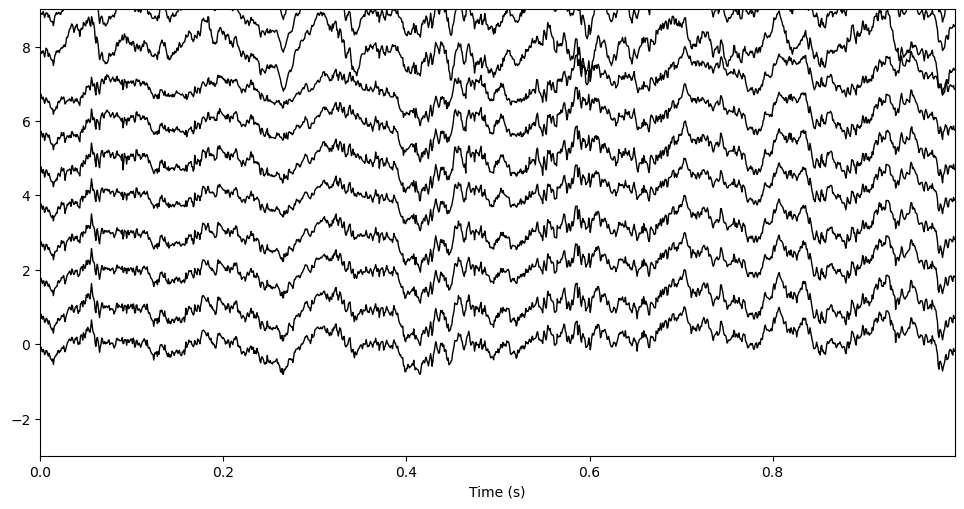

In [36]:
from cnn_ripple.visualizations.plot_ripples import plot_ripples

#@title Time (in seconds) { run: "auto", vertical-output: true, display-mode: "form" }
second =  0#@param {type:"integer"}

pred_indexes = loaded_ripple_detector.results[0]['pred_indexes'] # note only uses shank 0
fig, ax, plot_data = plot_ripples(loaded_ripple_detector.loaded_eeg_data, pred_indexes, second, downsampled_fs=1250)
# plot_data: {'lines':lines, 'fills':fills}

# Overflow

In [ ]:
## Update old pickled objects 2022-11-05:
loaded_ripple_detector._detected_ripple_epochs_df = ExtendedRippleDetection._build_post_load_ripple_df(loaded_ripple_detector.good_results.copy(), debug_print=False)
print(f'Saving ripple_df to csv: {loaded_ripple_detector.predicted_ripples_dataframe_csv_save_filepath}')
detected_ripple_epochs_df.to_csv(loaded_ripple_detector.predicted_ripples_dataframe_csv_save_filepath)
loaded_ripple_detector.save()

In [ ]:
def keys(a_dict, debug_print=True):
    out_list = list(a_dict.keys())
    if debug_print:
        print(out_list)
    return out_list

In [ ]:
test_detector, ripple_df, out_all_ripple_results, out_all_ripple_results = main_compute_with_params_loaded_from_xml(active_local_session_path)

In [ ]:
out_all_ripple_results['preprocessed_data']['data']

In [ ]:
out_all_ripple_results['computation_params']

In [ ]:
print(list(out_all_ripple_results['computation_params'].keys()))

In [ ]:
keys(out_all_ripple_results['computation_params'])
keys(out_all_ripple_results['preprocessed_data'])
keys(out_all_ripple_results['results'])

In [ ]:
from neuropy.utils.dynamic_container import DynamicContainer, override_dict, overriding_dict_with, get_dict_subset

# ['overlapping', 'window_size', 'stride', 'threshold', 'learning_rate', 'beta_1', 'beta_2', 'epsilon', 'amsgrad']
get_dict_subset(out_all_ripple_results['computation_params'], ['learning_rate', 'beta_1', 'beta_2', 'epsilon', 'amsgrad'])

In [ ]:
test_detector.save()

In [ ]:
loaded_ripple_detector.loaded_eeg_data

In [ ]:
keys(loaded_ripple_detector.results[0]['pred_indexes'])

## Batch resave previous pickles:

In [ ]:
for local_session_path in local_session_paths_list:
    in_ripple_detector_filepath = local_session_path.joinpath('ripple_detector.pkl')
    print(f'in_ripple_detector_filepath: {in_ripple_detector_filepath}')
    loaded_ripple_detector = ExtendedRippleDetection.load(in_ripple_detector_filepath)
    loaded_ripple_detector.save()